In [222]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def generateGraph(subject, catalog, year, szn):
    df = pd.read_csv(f'raw_data/{szn} {year}.csv')
    for section in df.loc[(df["Subject"] == subject) & (df["Catalog Nbr"] == catalog)]['Section']:

        row = df.loc[(df["Subject"] == subject) & (df["Catalog Nbr"] == catalog) & (df['Section'] == section)]

        rowHeaders = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F", "CR", "NC", "I", "W"]

        updatedRows = []
        updatedHeaders = []
        row2 = list(row.to_dict('index').values())[0]
        for header in rowHeaders:
            if row2[header] >= 0:
                updatedRows.append(row2[header])
                updatedHeaders.append(header)

        fig = plt.figure(figsize = (10, 5))
        ax = fig.gca()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        my_cmap = plt.get_cmap("viridis")
        # creating the bar plot
        plt.bar(updatedHeaders, updatedRows, color=my_cmap.colors,
                width = 0.4, zorder=3)

        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.grid(zorder=0)
        plt.title(f"{subject} {catalog}.{section}  {row['Instructor 1'].iloc[0]}  {szn} {year}", fontsize = 20)
        plt.savefig(f"{szn}{year}{subject}{catalog}-{section}.png")

        return sum(updatedRows)

def agreggateGraph(subject, catalog, year, szn):
    df = pd.read_csv(f'raw_data/{szn} {year}.csv')
    row = df.loc[(df["Subject"] == subject) & (df["Catalog Nbr"] == catalog)]
    rowHeaders = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F", "CR", "NC", "I", "W"]

    updatedRows = []
    updatedHeaders = []
    row2 = list(row.to_dict('index').values())

    totalDict = {}
    for row in row2:
        for header in rowHeaders:
            if row[header] >= 0:
                if header in totalDict:
                    totalDict[header] += row[header]
                else:
                    totalDict[header] = row[header]
            else:
                if header not in totalDict:
                    totalDict[header] = 0
    for header in rowHeaders:
        if totalDict[header] >= 0:
            updatedRows.append(totalDict[header])
            updatedHeaders.append(header)

    fig = plt.figure(figsize = (10, 5))
    ax = fig.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    my_cmap = plt.get_cmap("viridis")
    # creating the bar plot
    plt.bar(updatedHeaders, updatedRows, color=my_cmap.colors,
            width = 0.4, zorder=3)

    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(zorder=0)
    plt.title(f"{subject} {catalog}.ALL  {szn} {year}", fontsize = 20)
    plt.savefig(f"{szn}{year}{subject}{catalog}-ALL.png")

    return sum(updatedRows), pd.Series(totalDict,index=totalDict.keys()).describe()


(282.0,
 count    17.000000
 mean     16.588235
 std      16.282885
 min       0.000000
 25%       4.000000
 50%      15.000000
 75%      25.000000
 max      61.000000
 dtype: float64)

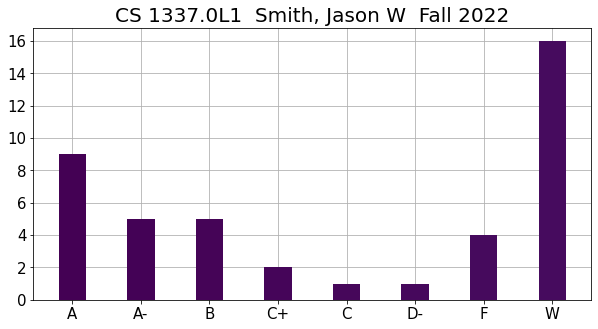

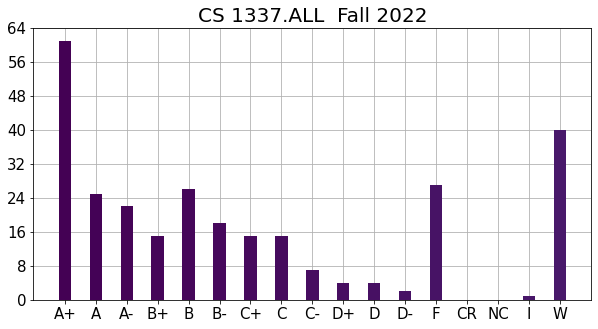

In [223]:
subject = "CS"
catalog = "1337"
year = "2022"
szn = "Fall"

generateGraph(subject, catalog, year, szn)
agreggateGraph(subject, catalog, year, szn)